In [1]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import string
%matplotlib inline 

def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString.lower()

def removeStopWords(str, set):
    toks = str.split()
    new_toks = []
    for elem in toks:
        if elem not in set:
            new_toks.append(elem)
    return string.join(new_toks, " ");

def printMostCommonWords(vectorizer, component):
    cuttOff = max(abs(component)) - 0.02
    for i in range(0, len(component)):
        if abs(component[i]) > cuttOff:
            for key, value in vectorizer.vocabulary_.iteritems():
                if (value == i):
                    print key

vectorizer = CountVectorizer(min_df=1, stop_words = 'english')
stop_words = vectorizer.get_stop_words()
#stop_words = ['you', 'the', 'and', 'a', 'an', 'how', 'as', 'or', 'we', 'i', 'be']

studentIds = []
passingIndicators = []
responses = []
rawReponses = []
grades = []
wordCounts = []
responses_w_stop_words = []
with open('schell9_2.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        studentId = row[0]
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        
        if float(numericGrade) < 70:
            passingIndicator = 0
        else:
            passingIndicator = 1;
            
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response and not "img" in response and len(cleanToLetters(response).strip()) > 3:
                studentIds.append(int(studentId))
                rawReponses.append(response)
                grades.append(float(numericGrade))
                cleaned = cleanToLetters(response)
                responses_w_stop_words.append(cleaned)
                wordCount = len(cleaned.split())
                wordCounts.append(wordCount)
                cleaned_no_stop_words = removeStopWords(cleaned, stop_words)
                responses.append(cleaned_no_stop_words)
                passingIndicators.append(passingIndicator)
                
data = {'studentId' : studentIds, 'grades' : grades, 'pass' : passingIndicators, 
        'responses' : responses, "raw" : rawReponses, 'wordCount' : wordCounts}
frame = pd.DataFrame(data)
frame.head()


,grades,pass,raw,responses,studentId,wordCount
0,91.913717,1,How to compute inverse trigonometry.,compute inverse trigonometry,1486608,5
1,91.913717,1,"Figuring out what the natural domain of f is,...",figuring natural domain f given functions,1486608,12
2,95.745009,1,I am still confused about inverse trig functi...,confused inverse trig functions understand def...,1486619,20
3,95.745009,1,"In general, I am a bit confused about everyth...",general bit confused think fixed small crash c...,1486619,57
4,95.745009,1,Daniel Garcia EID: djg2594 I had significant ...,daniel garcia eid djg significant trouble solv...,1486619,43


In [2]:

groupedStudentIds = []
groupedPassingIndicators = []
groupedResponses = []
groupedGrades = []
groupedWordCounts = []
for name, group in frame.groupby('studentId'):
    groupedStudentIds.append(name)
    groupedGrades.append(group['grades'].max())
    groupedPassingIndicators.append(group['pass'].max())
    groupedResponses.append(string.join(group['responses'].tolist(), ' '))
    groupedWordCounts.append(group['wordCount'].mean())

groupedData = {'studentId' : groupedStudentIds, 'grades' : groupedGrades, 
               'pass' : groupedPassingIndicators, 'responses' : groupedResponses,
               'wordCountMean' : groupedWordCounts}
groupedFrame = pd.DataFrame(groupedData)
groupedFrame.head()


,grades,pass,responses,studentId,wordCountMean
0,83.668937,1,dont quite understand arcs meansas difference ...,1486607,19.500000
1,91.913717,1,compute inverse trigonometry figuring natural ...,1486608,9.125000
2,80.108808,1,trouble question asked value x does fx arcsec...,1486609,10.233333
3,90.550902,1,little confused supposed deal traingles solvin...,1486610,20.500000
4,99.416510,1,add subtraction logs base set use calculator i...,1486611,14.666667


In [3]:
vectorizer = CountVectorizer(min_df=8, max_df = 0.05, ngram_range = (1, 4))
wordVector = vectorizer.fit_transform(groupedResponses)
vectorizer.vocabulary_


{u'fit': 334,
 u'rates questions': 792,
 u'im doing wrong': 454,
 u'exact': 286,
 u'following': 335,
 u'bit difficult': 51,
 u'im having hard time': 458,
 u'local max': 592,
 u'graph look': 408,
 u'graphed': 411,
 u'graphs derivatives': 418,
 u'certain functions': 62,
 u'estimate': 283,
 u'largest delta': 534,
 u'wording': 1024,
 u'using product': 999,
 u'confused need': 130,
 u'funtion': 383,
 u'sine cosine tangent': 871,
 u'types discontinuity': 949,
 u'thank julia serna': 916,
 u'understand know': 964,
 u'ended': 268,
 u'confused dont relates': 106,
 u'using trig': 1005,
 u'function like': 362,
 u'problem using': 727,
 u'trigs': 944,
 u'just didnt': 510,
 u'radicals': 786,
 u'including': 472,
 u'little confused area': 583,
 u'continuous differentiable': 165,
 u'graph fx': 405,
 u'functions need': 378,
 u'forgot': 337,
 u'confused optimization': 132,
 u'youre': 1032,
 u'derivatives inverse trig functions': 201,
 u'log base': 595,
 u'confusing just': 154,
 u'derivative exponential': 1

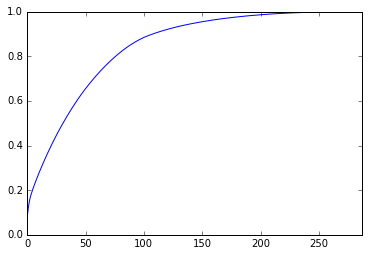

In [4]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=1000)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [5]:
# Obtain the base vectors for a 150 dimensional space.
pca = PCA(n_components=150)
pca.fit(wordVector.toarray())
wordVectorReduced = pca.transform(wordVector.toarray())


In [6]:
print "Common words in component 0:"
printMostCommonWords(vectorizer, pca.components_[0])
print "Common words in component 1:"
printMostCommonWords(vectorizer, pca.components_[1])
print "Common words in component 2:"
printMostCommonWords(vectorizer, pca.components_[2])
print "Common words in component 3:"
printMostCommonWords(vectorizer, pca.components_[3])
print "Common words in component 4:"
printMostCommonWords(vectorizer, pca.components_[4])

Common words in component 0:
area curve supposed
area curve supposed represent
confused area
confused area curve
confused area curve supposed
curve supposed
curve supposed represent
implict
implict differentiation
little confused area
little confused area curve
question confused dont
supposed represent
Common words in component 1:
implict
implict differentiation
question confused dont
Common words in component 2:
area curve supposed
area curve supposed represent
confused area
confused area curve
confused area curve supposed
curve supposed
curve supposed represent
little confused area
little confused area curve
supposed represent
Common words in component 3:
angle
close
eventually
ladder
told
Common words in component 4:
julia
julia serna
professor hamrick
serna


model MSE: 100.823995737
MSE from average: 187.939652446


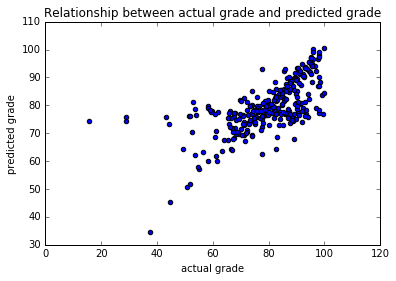

In [7]:
YGrades = np.array(groupedGrades, dtype = float)
X = pd.DataFrame(wordVectorReduced)
lm = LinearRegression()
lm.fit(X, YGrades)
groupedFrame["Predicted Grade"] = lm.predict(X)

plt.scatter(YGrades, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

print "model MSE:", np.mean((YGrades - lm.predict(X)) ** 2)
print "MSE from average:", np.mean((YGrades - np.mean(YGrades)) ** 2)


In [8]:
clf = LogisticRegression()
YPassFail = np.array(groupedPassingIndicators, dtype = float)
clf.fit(X, YPassFail)
groupedFrame["Pass Probabiliy"] = [x[1] for x in clf.predict_proba(X)]
groupedFrame.to_csv('predictions.csv')


In [9]:
groupedFrame.describe()

,grades,pass,studentId,wordCountMean,Predicted Grade,Pass Probabiliy
count,288.000000,288.000000,2.880000e+02,288.000000,288.000000,288.000000
mean,79.752337,0.798611,1.554084e+06,13.450381,79.752337,0.790545
std,13.732971,0.401736,9.080049e+04,5.891044,9.349823,0.237025
min,15.573811,0.000000,1.486607e+06,3.000000,34.651488,0.037560
25%,72.395563,1.000000,1.486714e+06,10.000000,75.418022,0.721428
50%,82.347507,1.000000,1.492580e+06,12.244172,78.361368,0.855126
75%,90.176858,1.000000,1.686051e+06,15.120614,85.361737,0.965342
max,100.011454,1.000000,1.697135e+06,44.666667,100.558454,1.000000
